In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! mkdir "/content/data"
! cp "/content/drive/My Drive/Colab Notebooks/data/anavid/anavid_classification.zip" "/content/data"

In [ ]:
! unzip -d "/content/data" "/content/data/anavid_classification.zip"

In [ ]:
! pip install albumentations

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import VGG16
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten,MaxPool2D, BatchNormalization, Conv2D, InputLayer
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.optimizers import Adam
from keras.utils import Sequence
from keras.utils import to_categorical

from albumentations import (Blur, MotionBlur, MedianBlur,  GaussNoise, RandomGamma,
                            HorizontalFlip, ShiftScaleRotate, RandomBrightnessContrast, JpegCompression, 
                            OneOf, Compose)

In [ ]:
# def aug_image(image):
#     p = 0.2
#     aug = Compose([
#                    OneOf([
#                           Blur(p=p, blur_limit= (2,2)),
#                           MotionBlur(blur_limit=3,p = p),
#                           MedianBlur(blur_limit=3,p = p),
#                           GaussianBlur(blur_limit=3,p = p),
#                           GaussNoise(p = p),
#                           RandomGamma(p = p)
#                    ],p = p),
#                    HorizontalFlip(p=p),
#                    ShiftScaleRotate(shift_limit=0.06, scale_limit=0.2, rotate_limit=15, border_mode = 4, p=p),
#                    RandomBrightnessContrast(p=p),
#                    RandomShadow(p = p, num_shadows_lower=1, num_shadows_upper=3, shadow_dimension=4)
#     ],p=p)
#     image = aug(image = image)['image']
#     return image
# imagegen = ImageDataGenerator(preprocessing_function=aug_image,rescale=1./255)
# imagegen_ = ImageDataGenerator(preprocessing_function=None,rescale=1./255)
# train = imagegen.flow_from_directory("data/seg_train/seg_train",target_size=(150,150),batch_size=128)
# val = imagegen_.flow_from_directory("data/seg_test/seg_test",target_size=(150,150),batch_size=128)

In [ ]:
model = VGG16(include_top=False, input_shape=(224,224, 3))
for layer in model.layers:
	layer.trainable = False

x = Flatten()(model.output)
x = BatchNormalization()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=model.inputs, outputs=x)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
# model = Sequential()

# model.add(InputLayer(input_shape = (224,224,3)))
# model.add(Conv2D(32, kernel_size = (5,5), activation = 'relu', strides = (1,1), padding = 'same'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size = (2,2)))
# model.add(Conv2D(32, kernel_size = (5,5), activation = 'relu', strides = (1,1), padding = 'same'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size = (2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(512, activation = "relu"))
# model.add(Dropout(0.20))
# model.add(Dense(512, activation = "relu"))
# model.add(Dense(1, activation = "sigmoid"))
# model.summary()

In [ ]:
# import os
# import numpy as np
# import cv2
# class DataGenerator(Sequence):
#     def __init__(self, dataframe, image_path, batch_size = 32, mode = "train"):
#         self.dataframe = dataframe
#         self.batch_size = batch_size
#         self.mode = mode
#         self.folder_path = image_path
#         self.labels = self.dataframe["emergency_or_not"].values
#         # self.labels = to_categorical(self.labels)
#         self.img_list = self.dataframe["image_names"].tolist()
        
#     def on_epoch_end(self):
#         self.indexes = np.arange(self.img_list)
#         if self.mode == "train":
#             self.indexes = random.sample(self.indexes, k = len(self.indexes))
    
#     def __len__(self):
#         return(self.dataframe.shape[0]//self.batch_size)
    
#     def get_batch_features(self, idx):
#         # img_name_list = [im for im in self.img_list[idx * self.batch_size : (1+idx) * self.batch_size]] 
#         # print("image_name_list -----",img_name_list,"\n\n\n\n\n")
#         # images = [self.get_image(i) for i in img_name_list]
#         # return(np.array(images))
#         return(self.np.array([self.cv2.imread(self.folder_path+im) for im in self.img_list[idx * self.batch_size : (1+idx) * self.batch_size]]))
    
#     def get_batch_labels(self,idx):
#         return(self.np.array(self.labels[idx * self.batch_size : (1+idx) * self.batch_size]))
    
#     def get_image(self,img_name):
#         print("folder path -----",self.folder_path,"\n\n\n\n\n")
#         print("image name ------",img_name,"\n\n\n\n\n")
#         img = self.cv2.imread(self.join(self.folder_path,img_name))
#         img = self.cv2.cvtColor(img, self.cv2.COLOR_BGR2RGB) 
#         img = img/255.0
#         return img
        
#     def __getitem__(self, idx):
#         batch_X = self.get_batch_features(idx)
#         batch_Y = self.get_batch_labels(idx)
#         return(batch_X,batch_Y)

In [ ]:
import numpy as np
import math
import random

class DataGenerator(Sequence):

    def __init__(self, dataframe, image_path, batch_size = 32, mode = "train"):
        self.dataframe = dataframe
        self.batch_size = batch_size
        self.mode = mode
        self.folder_path = image_path
        self.labels = self.dataframe["emergency_or_not"].values
        self.img_list = self.dataframe["image_names"].tolist()

    def __len__(self):
        return math.ceil(self.dataframe.shape[0]/self.batch_size)

    def read(self,file_name):
        img = load_img(self.folder_path+file_name, target_size = (224,224,3))
        img = img_to_array(img)
        if self.mode == 'train':
            img = self.aug_image(img)
        img = img/255.0
        return(img)
    
    def on_epoch_end(self):
        self.indexes = range(len(self.img_list))
        if self.mode == 'train':
            self.indexes = random.sample(self.indexes, k=len(self.indexes))
    
    def aug_image(self,image):
        p = 0.2
        aug = Compose([
                    OneOf([
                            Blur(p=p, blur_limit= (2,2)),
                            MotionBlur(blur_limit=3,p = p),
                            MedianBlur(blur_limit=3,p = p),
                            GaussNoise(p = p),
                            RandomGamma(p = p)
                    ],p = p),
                    HorizontalFlip(p=p),
                    ShiftScaleRotate(shift_limit=0.06, scale_limit=0.2, rotate_limit=15, border_mode = 4, p=p),
                    RandomBrightnessContrast(p=p)
        ],p=p)
        image = aug(image = image)['image']
        return image
    
    def __getitem__(self, idx):
        batch_x = self.img_list[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.labels[idx * self.batch_size:(idx + 1) * self.batch_size]
        #print(batch_x,batch_y)

        return np.array([self.read(file_name) for file_name in batch_x]), np.array(batch_y)

In [ ]:
import pandas as pd
df = pd.read_csv("/content/data/ana_vid_vehicle_classification/train.csv")

In [ ]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df, test_size=0.2 , random_state = 12345 )

In [ ]:
train_generator = DataGenerator(train, "/content/data/ana_vid_vehicle_classification/images/",mode = "train")
val_generator = DataGenerator(val, "/content/data/ana_vid_vehicle_classification/images/", mode = "val")

In [ ]:
opt = Adam(lr = 0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto')

In [ ]:
epochs = 32

In [ ]:
history = model.fit_generator(train_generator, epochs=epochs, steps_per_epoch = 40, validation_data=val_generator, verbose = 1, callbacks=[learning_rate_reduction, early_stopping])

Epoch 1/32
40/40 [==============================] - 16s 406ms/step - loss: 0.5359 - accuracy: 0.8850 - val_loss: 0.5089 - val_accuracy: 0.8424
Epoch 2/32
40/40 [==============================] - 16s 388ms/step - loss: 0.1789 - accuracy: 0.9398 - val_loss: 0.4117 - val_accuracy: 0.8697
Epoch 3/32
40/40 [==============================] - 15s 385ms/step - loss: 0.4201 - accuracy: 0.9297 - val_loss: 0.0248 - val_accuracy: 0.9061
Epoch 4/32
40/40 [==============================] - 15s 379ms/step - loss: 0.3955 - accuracy: 0.9404 - val_loss: 3.7617e-06 - val_accuracy: 0.9212
Epoch 5/32
40/40 [==============================] - 16s 390ms/step - loss: 0.0880 - accuracy: 0.9672 - val_loss: 1.8271e-07 - val_accuracy: 0.9061
Epoch 6/32
40/40 [==============================] - 15s 384ms/step - loss: 0.1408 - accuracy: 0.9673 - val_loss: 3.0943e-04 - val_accuracy: 0.9152
Epoch 7/32
40/40 [==============================] - 15s 378ms/step - loss: 0.1096 - accuracy: 0.9624 - val_loss: 3.2820e-04 - val_

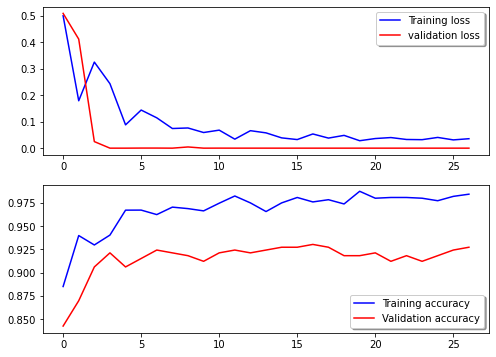

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

fig, ax = plt.subplots(2,1, figsize=(8, 6))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
df_t = pd.read_csv("/content/data/ana_vid_vehicle_classification/test_vc2kHdQ.csv")

In [ ]:
def im_predict(image_names_list,folder_path):
    images = np.array([read(file_name,folder_path) for file_name in image_names_list])
    results = model.predict(images)
    results = [1 if(i>0.5)  else 0 for i in results]
    return(results)

def read(file_name,folder_path):
    img = load_img(folder_path+file_name, target_size = (224,224,3))
    img = img_to_array(img)
    img = img/255.0
    return(img)


In [ ]:
X = list(df_t["image_names"])
Y = im_predict(X,"/content/data/ana_vid_vehicle_classification/images/")

df_sub = pd.DataFrame({"image_names":X,"emergency_or_not":Y})

In [ ]:
df_sub.to_csv("anavid_vehi.csv",index=False)

In [ ]:
from google.colab import files
files.download('anavid_vehi.csv') 